In [1]:
import os
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import random


In [2]:
data_path = '/Users/rahulnarramneni/Documents/Projects/MartianSurfaceAnamolyDetection/data/raw/hirise-map-proj-v3'

classmap_df = pd.read_csv(os.path.join(data_path,"landmarks_map-proj-v3_classmap.csv"))
labels_df = pd.read_csv(os.path.join(data_path,"labels-map-proj-v3.txt"),sep=" ",header=None,names=["image", "label"])

classmap_df

,0,other
0,1,crater
1,2,dark dune
2,3,slope streak
3,4,bright dune
4,5,impact ejecta
5,6,swiss cheese
6,7,spider


In [3]:
labels_df.head()

,image,label
0,ESP_011623_2100_RED-0069.jpg,0
1,ESP_011623_2100_RED-0069-r90.jpg,0
2,ESP_011623_2100_RED-0069-r180.jpg,0
3,ESP_011623_2100_RED-0069-r270.jpg,0
4,ESP_011623_2100_RED-0069-fh.jpg,0


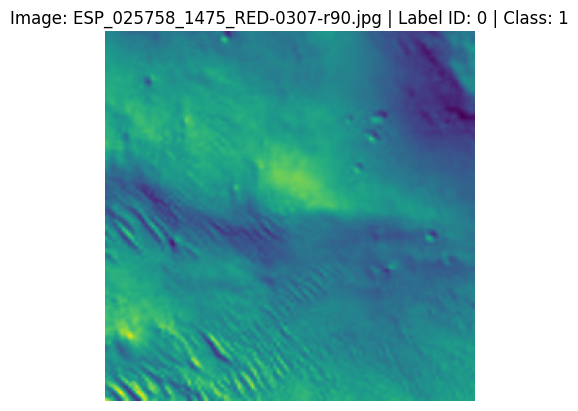

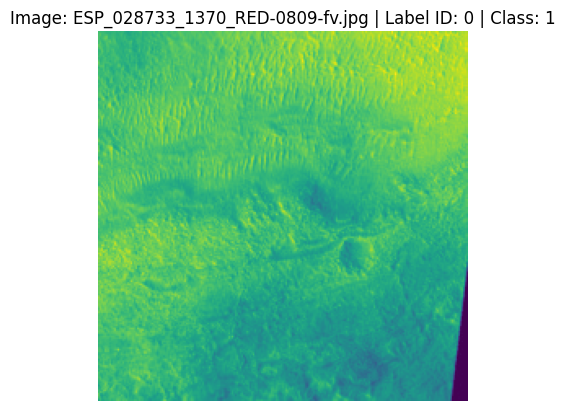

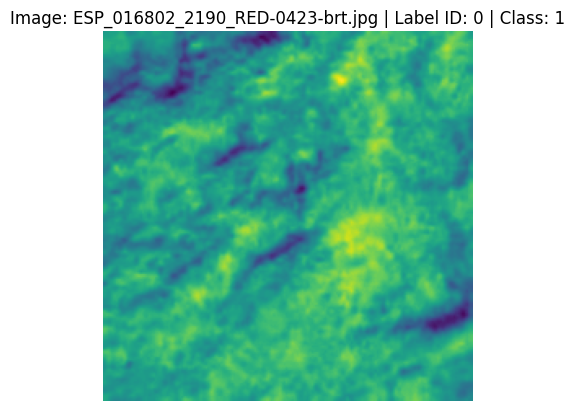

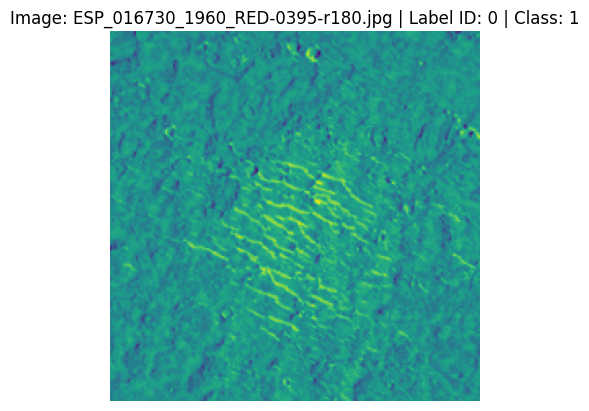

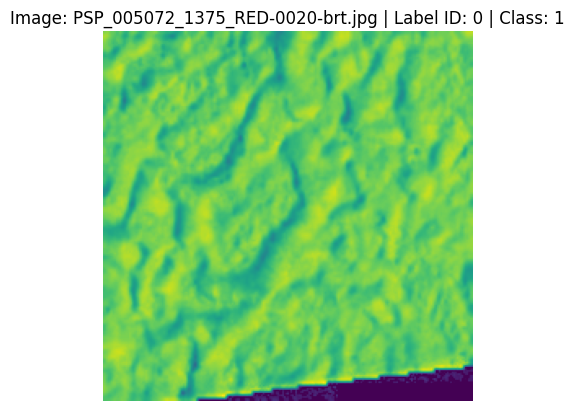

In [4]:
# Function to display random images with labels
def display_random_images(data_path, labels_df, classmap_df, num_images=5):
    random_images = random.sample(labels_df["image"].tolist(), num_images)

    for image_name in random_images:
        img_path = os.path.join(data_path, "map-proj-v3", f"{image_name}")
        label_id = labels_df[labels_df["image"] == image_name]["label"].values[0]
        
        # Extract the class name based on the index (class ID)
        class_name = classmap_df.loc[label_id].values[0]

        # Display image and label
        img = Image.open(img_path)
        plt.imshow(img)
        plt.title(f"Image: {image_name} | Label ID: {label_id} | Class: {class_name}")
        plt.axis("off")
        plt.show()

# Display random images with labels
display_random_images(data_path, labels_df, classmap_df, num_images=5)


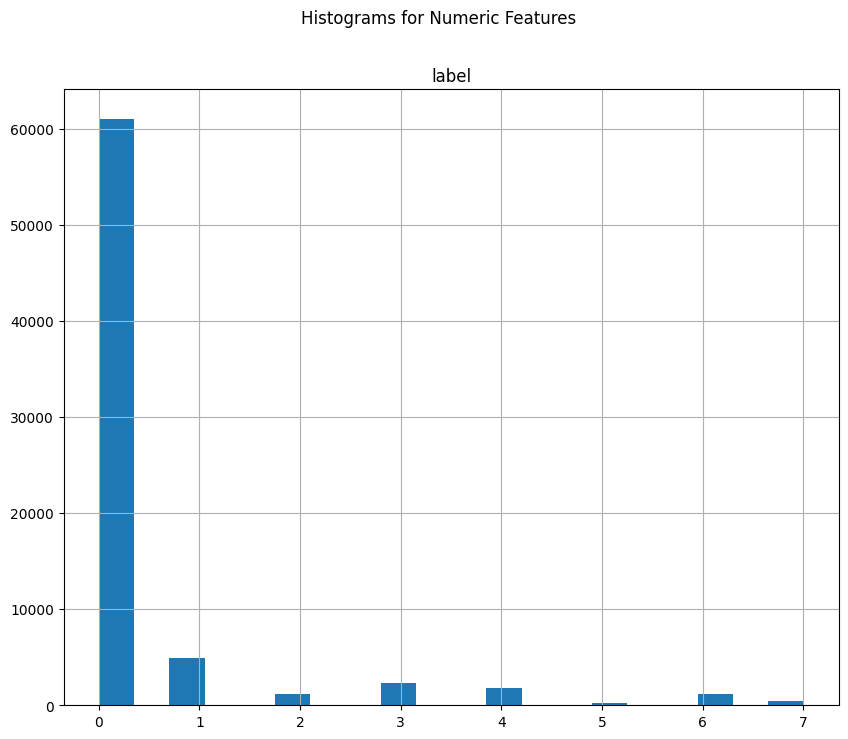

In [5]:
import seaborn as sns

# EDA with comprehensive visualizations

# Histograms for numeric features (if applicable)
labels_df.hist(figsize=(10, 8), bins=20)
plt.suptitle('Histograms for Numeric Features')
plt.show()


# Run comprehensive EDA



In [21]:
# Box plots for numeric features (if applicable)
plt.figure(figsize=(12, 6))
sns.boxplot(x='label', y='value', data=pd.melt(labels_df, id_vars=['label']))  # Use pd.melt to handle multiple numeric features
plt.xlabel('Class Label')
plt.ylabel('Value')
plt.title('Box Plots for Numeric Features by Class Label')
plt.show()




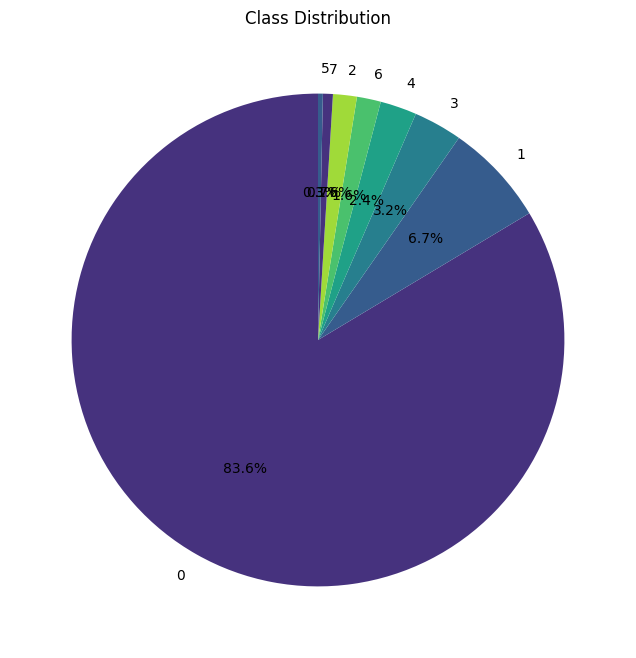

In [8]:
# Pie chart for class distribution
class_distribution = labels_df["label"].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(class_distribution, labels=class_distribution.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis'))
plt.title('Class Distribution')
plt.show()



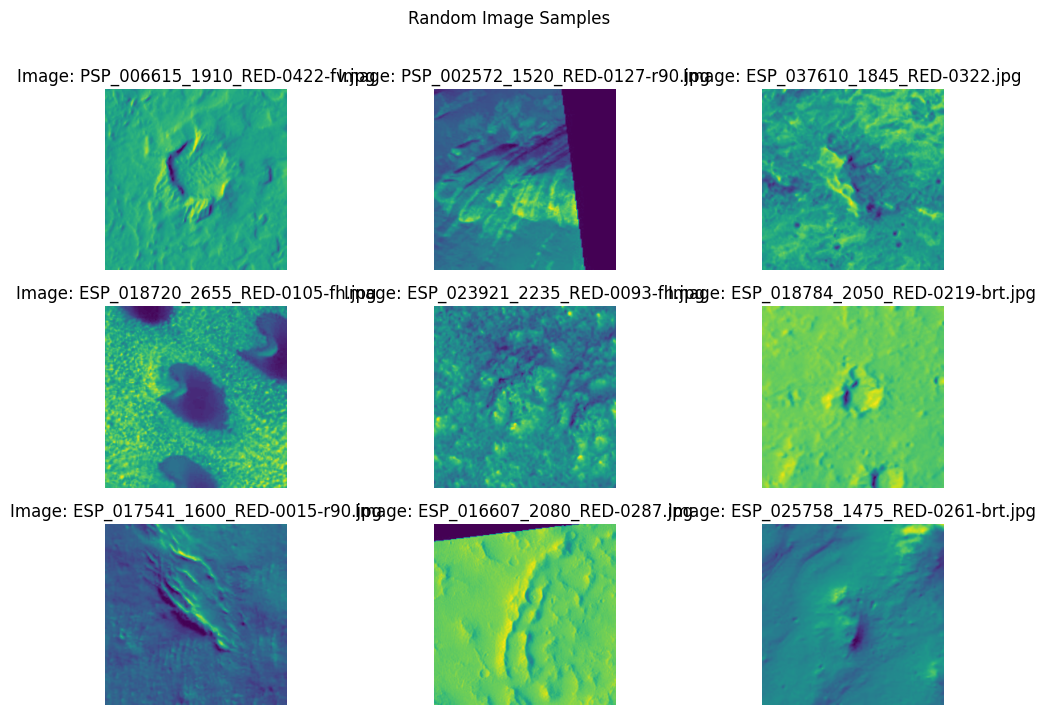

In [10]:
# Image grid with random samples
random_samples = random.sample(labels_df["image"].tolist(), 9)
img_grid = [Image.open(os.path.join(data_path, "map-proj-v3", f"{img}")) for img in random_samples]

plt.figure(figsize=(12, 8))
for i, img in enumerate(img_grid, 1):
    plt.subplot(3, 3, i)
    plt.imshow(img)
    plt.title(f"Image: {random_samples[i-1]}")
    plt.axis("off")

plt.suptitle('Random Image Samples')
plt.show()
